In [726]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [727]:
demography = pd.read_excel('data/all.xlsx')

In [728]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [729]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [730]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.341935,72.561290,0.426645
Czech cuisine,53.896739,55.793478,0.393967
Italian cuisine,51.000000,82.360248,0.436832


In [731]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.38
Czech cuisine,54.0,38.0,0.34
Italian cuisine,53.0,45.0,0.37


# Favourite category

In [732]:
demography.value_counts('Favourite category')

Favourite category
Czech cuisine      184
Italian cuisine    161
Asian cuisine      155
dtype: int64

<AxesSubplot:ylabel='None'>

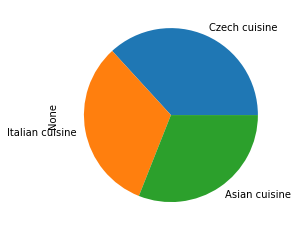

In [733]:
demography.value_counts('Favourite category').plot(kind='pie')

# Ad Type

In [734]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          244
print-on-bus              79
citylight                 68
promo stand small         39
billboard                 33
hostess on the street     33
radio spot                 4
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [735]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

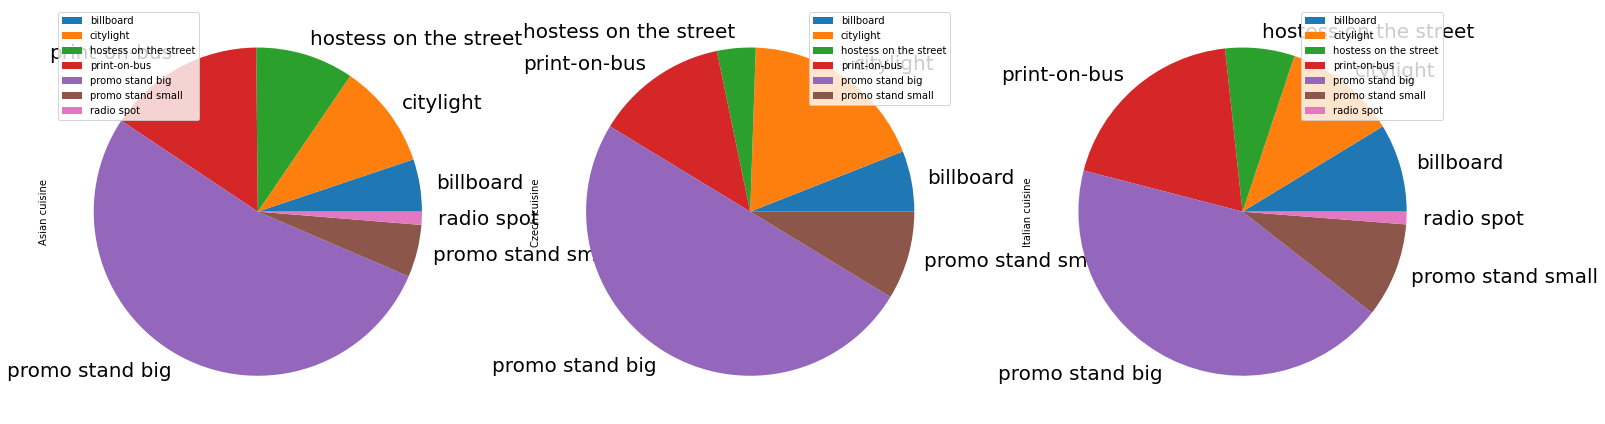

In [736]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [737]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [738]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [739]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

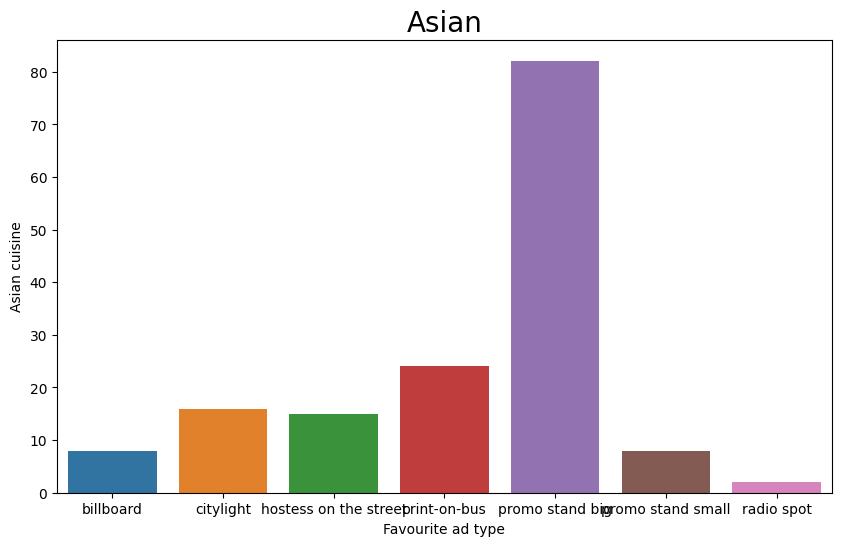

In [740]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

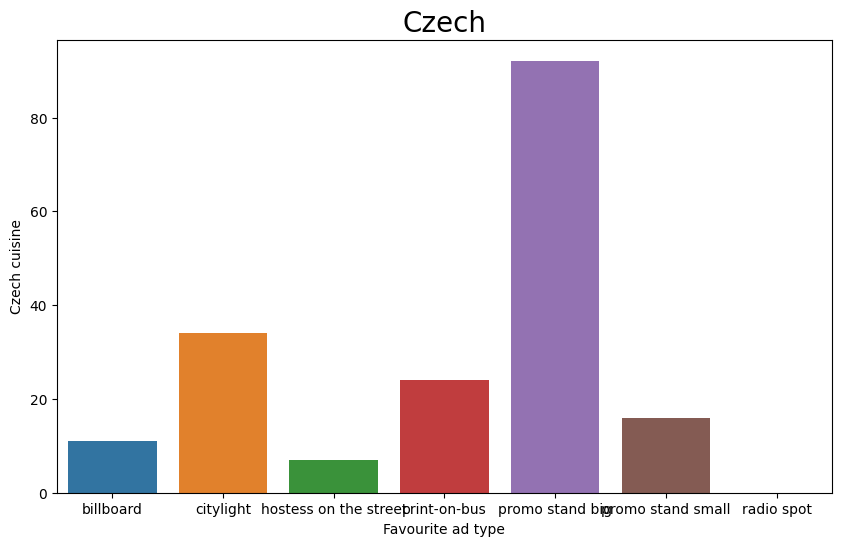

In [741]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

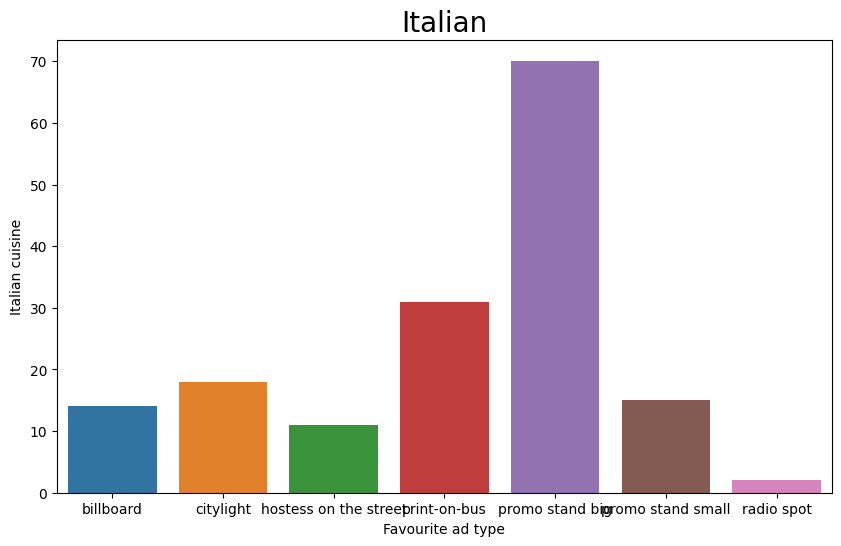

In [742]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

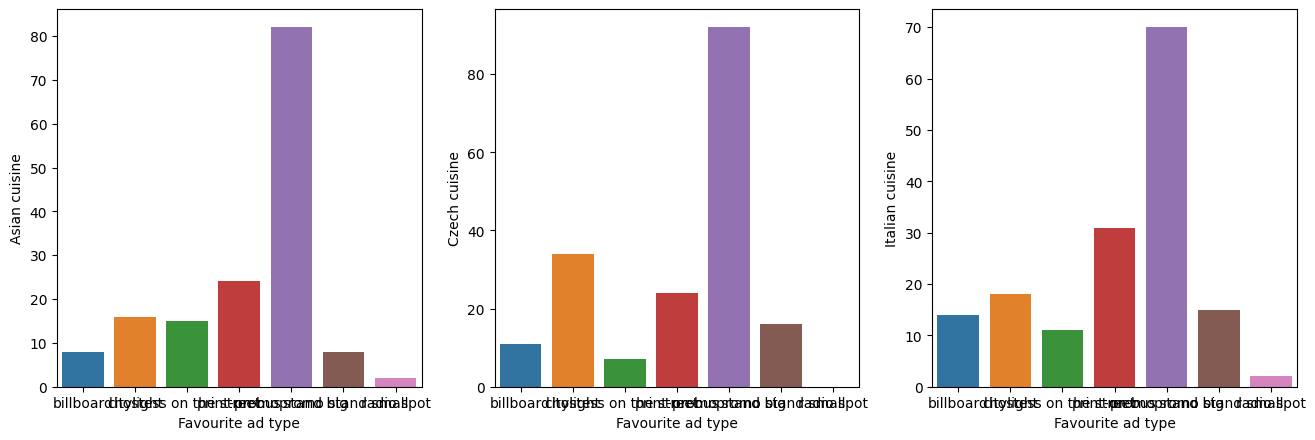

In [743]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [744]:
new_df = demography[demography['Favourite category'] == 'Czech cuisine']

In [745]:
new_df[demography['Favourite ad type'] == 'promo stand big'].describe(include=['object'])

C:\Users\utikp\AppData\Local\Temp\ipykernel_18996\1507840416.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[demography['Favourite ad type'] == 'promo stand big'].describe(include=['object'])


,Name,Gender,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,TUE 0-8h,TUE 8-16h,TUE 16-24h,...,THU 16-24h,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h
count,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
unique,72,2,1,1,4,5,4,5,5,3,...,3,4,5,4,4,5,3,4,4,3
top,JM,Female,Czech cuisine,promo stand big,Industrial district,Industrial district,Housing district,Industrial district,Industrial district,Housing district,...,Housing district,Outskirts,Outskirts,Housing district,Industrial district,Industrial district,Housing district,Industrial district,Industrial district,Housing district
freq,4,47,92,92,34,39,69,33,34,64,...,44,37,33,47,37,35,64,37,34,74


In [746]:
cz_df = demography[demography['Favourite category'] == 'Czech cuisine']

In [747]:
cz_df[demography['Favourite ad type'] == 'promo stand big'].describe()

C:\Users\utikp\AppData\Local\Temp\ipykernel_18996\3228349922.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cz_df[demography['Favourite ad type'] == 'promo stand big'].describe()


,Age,Weekly income,Preferred quality
count,92.000000,92.000000,92.000000
mean,52.510870,53.739130,0.390326
std,21.737947,34.095815,0.150292
min,15.000000,24.000000,0.210000
25%,37.500000,33.000000,0.280000
50%,50.000000,39.500000,0.350000
75%,72.500000,76.000000,0.470000
max,90.000000,247.000000,0.910000


# WIP

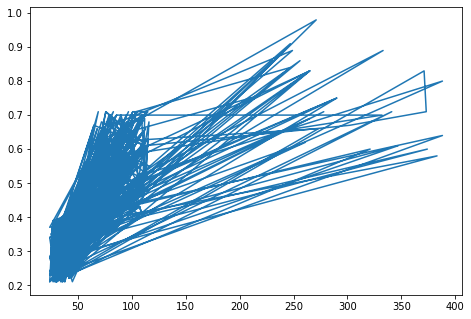

In [748]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [749]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine        155    119  JG    4    155      2  Female   79   
Czech cuisine        184    134  JM    4    184      2    Male   99   
Italian cuisine      158    119  SK    4    161      2  Female   94   

                   Favourite ad type         ...             SUN 0-8h       \
                               count unique  ...                  top freq   
Favourite category                           ...                             
Asian cuisine                    155      7  ...      Office district   43   
Czech cuisine                    184      6  ...  Industrial district   69   
Italian cuisine                  161      7  ...            Outskirts   45   

                   SUN 8-16h                                  SUN 16-24h  \
                       count unique                  top freq      count   
Favourite category                                                         
Asian cuisine            155      5            Outskirts   46        155   
Czech cuisine            184      5            Outskirts   65        184   
Italian cuisine          161      5  Industrial district   43        161   

                                                  
                   unique               top freq  
Favourite category                                
Asian cuisine           4  Housing district  110  
Czech cuisine           4  Housing district  156  
Italian cuisine         5  Housing district  120  

[3 rows x 96 columns]

## Excel


In [750]:
weather = pd.read_excel('data/excel/Section3_Logical_Operators.xlsx')

In [751]:
ex = pd.read_excel('data/excel/Section2_Formulas101.xlsx')

### getting dd/mm/yy

In [752]:
ex['Birth Year'] = pd.DatetimeIndex(ex['Birth Date']).year

### getting first 3 characters form string

In [753]:
ex['Area Code'] = ex['Telephone'].str[:3]

### getting username from emails

In [754]:
ex['Username'] = ex['E-mail'].str.split('@').str[0]

### upload to excel

In [755]:
# ex.to_excel('data/Section2_Formulas101.xlsx', index=False)

In [756]:
weather

,STATION,STATION_NAME,LAT,LONG,DATE,MONTH,TEMP (F),PRCP (mm),Freeze,Climate,PRCP Type,Conditions,Missing Data?
0,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20100101,1,37.0,0,NaN,NaN,NaN,NaN,NaN
1,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20100102,1,12.0,109,NaN,NaN,NaN,NaN,NaN
2,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20100103,1,23.0,51,NaN,NaN,NaN,NaN,NaN
3,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20100104,1,34.0,0,NaN,NaN,NaN,NaN,NaN
4,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20100105,1,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20131227,12,NaN,0,NaN,NaN,NaN,NaN,NaN
1457,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20131228,12,45.0,0,NaN,NaN,NaN,NaN,NaN
1458,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20131229,12,34.0,335,NaN,NaN,NaN,NaN,NaN
1459,GHCND:USW00014739,BOSTON LOGAN AIRPORT,42.3606,-71.0106,20131230,12,29.0,0,NaN,NaN,NaN,NaN,NaN


In [757]:
def freeze(x):
    if x < 32:
        return 'Yes'
    return 'No'

In [758]:
def climate(x):
    if x < 40:
        return 'Cold'
    elif x > 80:
        return 'Hot'
    return 'Mild'

In [759]:
weather['Freeze'] = weather['TEMP (F)'].apply(freeze)
weather['Climate'] = weather['TEMP (F)'].apply(climate)

In [760]:
def prcp(x,y):
    if x == 'Yes' and y > 0:
        return 'Snow'
    elif x == 'No' and y > 0:
        return 'Rain'
    return 'None'

In [761]:
weather['PRCP Type'] = np.vectorize(prcp)(weather['Freeze'], weather['PRCP (mm)'])

In [762]:
def conditions(x):
    if x == 'Snow':
        return 'Dry'
    return 'Wet'

In [763]:
weather['Conditions'] = weather['PRCP Type'].apply(conditions)